In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('C:/Users/ADITYA/Downloads/Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
label = LabelEncoder()
for i in data.columns:
    print(i)
    if data[i].dtypes ==object:
        data[i] = label.fit_transform(data[i])
    else:
            pass

Undergrad
Marital.Status
Taxable.Income
City.Population
Work.Experience
Urban


In [8]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [9]:
data.rename(columns= {'Marital.Status': 'mar_st', 'Taxable.Income': 'tax_inc', 'City.Population': 'city_pl', "Work.Experience": 'work_exp' }, inplace=True)

In [10]:
data['Status'] = data['tax_inc'].apply(lambda tax_inc: 'Risky' if tax_inc <= 30000 else 'good')

In [11]:
data.drop(['tax_inc'], axis =1, inplace=True)
data

,Undergrad,mar_st,city_pl,work_exp,Urban,Status
0,0,2,50047,10,1,good
1,1,0,134075,18,1,good
2,0,1,160205,30,1,good
3,1,2,193264,15,1,good
4,0,1,27533,28,0,good
...,...,...,...,...,...,...
595,1,0,39492,7,1,good
596,1,0,55369,2,1,good
597,0,0,154058,0,1,good
598,1,1,180083,17,0,good


array([[<AxesSubplot:title={'center':'Undergrad'}>,
        <AxesSubplot:title={'center':'mar_st'}>],
       [<AxesSubplot:title={'center':'city_pl'}>,
        <AxesSubplot:title={'center':'work_exp'}>],
       [<AxesSubplot:title={'center':'Urban'}>, <AxesSubplot:>]],
      dtype=object)

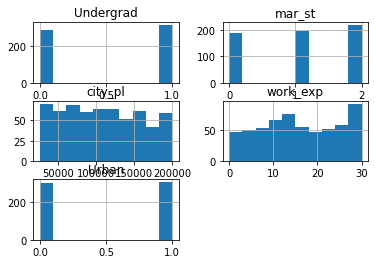

In [12]:
data.hist()

In [13]:
data['Status'] = label.fit_transform(data['Status'])
data

,Undergrad,mar_st,city_pl,work_exp,Urban,Status
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [14]:
array = data.values
X = array[:, 0:5]
Y = array[:, -1]
seed = 7

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [16]:
from sklearn.model_selection import  cross_val_score
kfold = KFold(n_splits=8, shuffle=False, random_state=None)
cart = DecisionTreeClassifier()
no_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=no_trees, random_state=7)
model.fit(X_train,Y_train)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7416666666666666


In [17]:
pred = model.predict(X_test)
pd.Series(pred).value_counts()

1    170
0     10
dtype: int64

In [18]:
pd.crosstab(Y_test, pred)

col_0,0,1
row_0,,
0,1,37
1,9,133


In [19]:
print("Accuracy: ", np.mean(pred==Y_test))

Accuracy:  0.7444444444444445


In [20]:
#RANDOM FOREST
No_tress = 100
max_features = 3 
kfold = KFold(n_splits=8, shuffle=False, random_state=None)
model1 = RandomForestClassifier(n_estimators=No_tress, max_features=max_features)
model1.fit(X_train,Y_train)
result2 = cross_val_score(model1, X, Y, cv=kfold)
print(result2.mean())

0.74


In [21]:
preds = model1.predict(X_test)
pd.Series(preds).value_counts()

1    174
0      6
dtype: int64

In [22]:
pd.crosstab(Y_test, preds)

col_0,0,1
row_0,,
0,0,38
1,6,136


In [23]:
print("Accuracy: ", np.mean(preds==Y_test))

Accuracy:  0.7555555555555555
